In [1]:
import random
import re
import string

import numpy as np
import pandas as pd
import seaborn as sns
import spacy
from nltk import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split

sns.set_style('darkgrid')
sns.set_context('paper')

seed = 0
random.seed(seed)
np.random.seed(seed)

In [2]:
df = pd.read_csv('reviews_train.csv')
df.head(10)


,reviewerID,asin,reviewerName,helpful,reviewText,summary,unixReviewTime,reviewTime,score
0,A35C43YE9HU9CN,B0064X7B4A,Joan Miller,"[0, 0]",I have decided not to play this game. I can't...,Friends,1396396800,"04 2, 2014",1.0
1,AHFS8CGWWXB5B,B00H1P4V3E,WASH ST. GAMER,"[3, 4]",The Amazon Appstore free app of the day for Ju...,"Amazon Makes This ""Longest Spring Ever"" for Fi...",1402272000,"06 9, 2014",2.0
2,A3EW8OTQ90NVHM,B00CLVW82O,Kindle Customer,"[0, 4]",this game was so mush fun I wish I could play ...,best,1368921600,"05 19, 2013",5.0
3,AJ3GHFJY1IUTD,B007T9WVKM,BrawlMaster4,"[0, 2]","Its pretty fun and very good looking, but you...",Fun Game,1350172800,"10 14, 2012",5.0
4,A3JJGBS4EL603S,B00J206J5E,"K. Wilson ""thesupe""","[0, 0]",good graphics; immersive storyline; hard to st...,great game!,1396915200,"04 8, 2014",5.0
5,A3RL7Y2FJBDHJ0,B006H7TC3Q,hi,"[2, 5]",its very good.u use fotos on ur device and it ...,very good,1337817600,"05 24, 2012",5.0
6,AUHVMC0PURGO8,B006R6VG9K,A.Mccullough,"[0, 0]",the game is very fun and fast paced. It also k...,fun and fast paced,1401926400,"06 5, 2014",5.0
7,A1Z37DUIWXJNLN,B00B63HT8Q,"Julie Quick ""Beach Bum Wannabe""","[0, 0]",great app! A quick look at the weather... not...,A great alternative to the current (stupid) ve...,1377388800,"08 25, 2013",4.0
8,AF7ZE5MRM6CW2,B00BL0I7WG,T.dd,"[0, 0]",So fare I like it haven't had it long enough t...,easy fun,1369612800,"05 27, 2013",5.0
9,A1TTH51E2651BJ,B00GRXA7GG,Joni,"[0, 0]",This classic Mahjong comes with nice graphics ...,Mahjong Premium,1394841600,"03 15, 2014",5.0


In [3]:
df.isnull().sum()

reviewerID         0
asin               0
reviewerName      14
helpful            0
reviewText         8
summary           24
unixReviewTime     0
reviewTime         0
score              0
dtype: int64

In [5]:
print(len(df))
df = df.dropna()
len(df)

555791


555745

In [6]:
df['reviewText'] = df['reviewText'].apply(str)

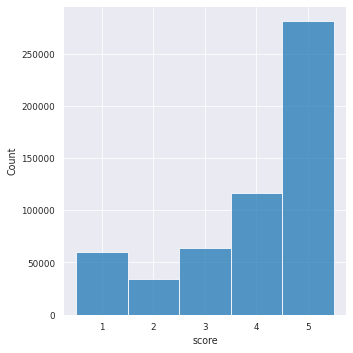

In [7]:
sns.displot(df, x='score', discrete=True).savefig('img/dist.png')

In [8]:
from ast import literal_eval

df['h1'] = df['helpful'].apply(literal_eval).apply(lambda x:x[0])
df['h2'] = df['helpful'].apply(literal_eval).apply(lambda x:x[1])
df['diff_h'] = df['h2'] - df['h1']
df.head(10)

,reviewerID,asin,reviewerName,helpful,reviewText,summary,unixReviewTime,reviewTime,score,h1,h2,diff_h
0,A35C43YE9HU9CN,B0064X7B4A,Joan Miller,"[0, 0]",I have decided not to play this game. I can't...,Friends,1396396800,"04 2, 2014",1.0,0,0,0
1,AHFS8CGWWXB5B,B00H1P4V3E,WASH ST. GAMER,"[3, 4]",The Amazon Appstore free app of the day for Ju...,"Amazon Makes This ""Longest Spring Ever"" for Fi...",1402272000,"06 9, 2014",2.0,3,4,1
2,A3EW8OTQ90NVHM,B00CLVW82O,Kindle Customer,"[0, 4]",this game was so mush fun I wish I could play ...,best,1368921600,"05 19, 2013",5.0,0,4,4
3,AJ3GHFJY1IUTD,B007T9WVKM,BrawlMaster4,"[0, 2]","Its pretty fun and very good looking, but you...",Fun Game,1350172800,"10 14, 2012",5.0,0,2,2
4,A3JJGBS4EL603S,B00J206J5E,"K. Wilson ""thesupe""","[0, 0]",good graphics; immersive storyline; hard to st...,great game!,1396915200,"04 8, 2014",5.0,0,0,0
5,A3RL7Y2FJBDHJ0,B006H7TC3Q,hi,"[2, 5]",its very good.u use fotos on ur device and it ...,very good,1337817600,"05 24, 2012",5.0,2,5,3
6,AUHVMC0PURGO8,B006R6VG9K,A.Mccullough,"[0, 0]",the game is very fun and fast paced. It also k...,fun and fast paced,1401926400,"06 5, 2014",5.0,0,0,0
7,A1Z37DUIWXJNLN,B00B63HT8Q,"Julie Quick ""Beach Bum Wannabe""","[0, 0]",great app! A quick look at the weather... not...,A great alternative to the current (stupid) ve...,1377388800,"08 25, 2013",4.0,0,0,0
8,AF7ZE5MRM6CW2,B00BL0I7WG,T.dd,"[0, 0]",So fare I like it haven't had it long enough t...,easy fun,1369612800,"05 27, 2013",5.0,0,0,0
9,A1TTH51E2651BJ,B00GRXA7GG,Joni,"[0, 0]",This classic Mahjong comes with nice graphics ...,Mahjong Premium,1394841600,"03 15, 2014",5.0,0,0,0


<AxesSubplot:ylabel='diff_h'>

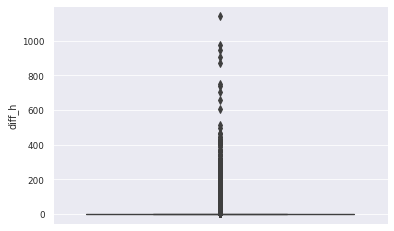

In [9]:
sns.boxplot(y=df['diff_h'])

In [10]:
df[df['diff_h'] < 0].head()

,reviewerID,asin,reviewerName,helpful,reviewText,summary,unixReviewTime,reviewTime,score,h1,h2,diff_h


In [11]:
df = df.drop(columns=['diff_h','h1','h2'])
df.head(5)

,reviewerID,asin,reviewerName,helpful,reviewText,summary,unixReviewTime,reviewTime,score
0,A35C43YE9HU9CN,B0064X7B4A,Joan Miller,"[0, 0]",I have decided not to play this game. I can't...,Friends,1396396800,"04 2, 2014",1.0
1,AHFS8CGWWXB5B,B00H1P4V3E,WASH ST. GAMER,"[3, 4]",The Amazon Appstore free app of the day for Ju...,"Amazon Makes This ""Longest Spring Ever"" for Fi...",1402272000,"06 9, 2014",2.0
2,A3EW8OTQ90NVHM,B00CLVW82O,Kindle Customer,"[0, 4]",this game was so mush fun I wish I could play ...,best,1368921600,"05 19, 2013",5.0
3,AJ3GHFJY1IUTD,B007T9WVKM,BrawlMaster4,"[0, 2]","Its pretty fun and very good looking, but you...",Fun Game,1350172800,"10 14, 2012",5.0
4,A3JJGBS4EL603S,B00J206J5E,"K. Wilson ""thesupe""","[0, 0]",good graphics; immersive storyline; hard to st...,great game!,1396915200,"04 8, 2014",5.0


In [12]:
df.head(5)

,reviewerID,asin,reviewerName,helpful,reviewText,summary,unixReviewTime,reviewTime,score
0,A35C43YE9HU9CN,B0064X7B4A,Joan Miller,"[0, 0]",I have decided not to play this game. I can't...,Friends,1396396800,"04 2, 2014",1.0
1,AHFS8CGWWXB5B,B00H1P4V3E,WASH ST. GAMER,"[3, 4]",The Amazon Appstore free app of the day for Ju...,"Amazon Makes This ""Longest Spring Ever"" for Fi...",1402272000,"06 9, 2014",2.0
2,A3EW8OTQ90NVHM,B00CLVW82O,Kindle Customer,"[0, 4]",this game was so mush fun I wish I could play ...,best,1368921600,"05 19, 2013",5.0
3,AJ3GHFJY1IUTD,B007T9WVKM,BrawlMaster4,"[0, 2]","Its pretty fun and very good looking, but you...",Fun Game,1350172800,"10 14, 2012",5.0
4,A3JJGBS4EL603S,B00J206J5E,"K. Wilson ""thesupe""","[0, 0]",good graphics; immersive storyline; hard to st...,great game!,1396915200,"04 8, 2014",5.0


In [13]:
def calc_ratio(x):
    if x[1] == 0:
        return 0
    pos = x[0]
    neg = x[1] - x[0]
    h = (pos - neg) / x[1]
    return h

df['help_ratio'] = df['helpful'].apply(literal_eval).apply(lambda x: calc_ratio(x))

In [14]:
df.head(10)

,reviewerID,asin,reviewerName,helpful,reviewText,summary,unixReviewTime,reviewTime,score,help_ratio
0,A35C43YE9HU9CN,B0064X7B4A,Joan Miller,"[0, 0]",I have decided not to play this game. I can't...,Friends,1396396800,"04 2, 2014",1.0,0.0
1,AHFS8CGWWXB5B,B00H1P4V3E,WASH ST. GAMER,"[3, 4]",The Amazon Appstore free app of the day for Ju...,"Amazon Makes This ""Longest Spring Ever"" for Fi...",1402272000,"06 9, 2014",2.0,0.5
2,A3EW8OTQ90NVHM,B00CLVW82O,Kindle Customer,"[0, 4]",this game was so mush fun I wish I could play ...,best,1368921600,"05 19, 2013",5.0,-1.0
3,AJ3GHFJY1IUTD,B007T9WVKM,BrawlMaster4,"[0, 2]","Its pretty fun and very good looking, but you...",Fun Game,1350172800,"10 14, 2012",5.0,-1.0
4,A3JJGBS4EL603S,B00J206J5E,"K. Wilson ""thesupe""","[0, 0]",good graphics; immersive storyline; hard to st...,great game!,1396915200,"04 8, 2014",5.0,0.0
5,A3RL7Y2FJBDHJ0,B006H7TC3Q,hi,"[2, 5]",its very good.u use fotos on ur device and it ...,very good,1337817600,"05 24, 2012",5.0,-0.2
6,AUHVMC0PURGO8,B006R6VG9K,A.Mccullough,"[0, 0]",the game is very fun and fast paced. It also k...,fun and fast paced,1401926400,"06 5, 2014",5.0,0.0
7,A1Z37DUIWXJNLN,B00B63HT8Q,"Julie Quick ""Beach Bum Wannabe""","[0, 0]",great app! A quick look at the weather... not...,A great alternative to the current (stupid) ve...,1377388800,"08 25, 2013",4.0,0.0
8,AF7ZE5MRM6CW2,B00BL0I7WG,T.dd,"[0, 0]",So fare I like it haven't had it long enough t...,easy fun,1369612800,"05 27, 2013",5.0,0.0
9,A1TTH51E2651BJ,B00GRXA7GG,Joni,"[0, 0]",This classic Mahjong comes with nice graphics ...,Mahjong Premium,1394841600,"03 15, 2014",5.0,0.0


In [15]:
df[['help_ratio', 'score']].corr(method='spearman')

,help_ratio,score
help_ratio,1.000000,0.038319
score,0.038319,1.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555745 entries, 0 to 555790
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   reviewerID      555745 non-null  object 
 1   asin            555745 non-null  object 
 2   reviewerName    555745 non-null  object 
 3   helpful         555745 non-null  object 
 4   reviewText      555745 non-null  object 
 5   summary         555745 non-null  object 
 6   unixReviewTime  555745 non-null  int64  
 7   reviewTime      555745 non-null  object 
 8   score           555745 non-null  float64
 9   help_ratio      555745 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 46.6+ MB


In [17]:
df.describe()

,unixReviewTime,score,help_ratio
count,5.557450e+05,555745.000000,555745.000000
mean,1.368604e+09,3.945410,0.136620
std,2.353921e+07,1.354681,0.489663
min,1.300752e+09,1.000000,-1.000000
25%,1.354579e+09,3.000000,0.000000
50%,1.370650e+09,5.000000,0.000000
75%,1.388707e+09,5.000000,0.333333
max,1.406074e+09,5.000000,1.000000


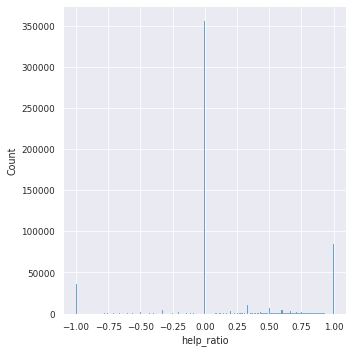

In [18]:
sns.displot(df['help_ratio']).savefig('img/helpratio')

In [19]:
def calc_ratio(x):
    if x[1] == 0:
        return 0
    return x[0]/x[1]

df['pos'] = df['helpful'].apply(literal_eval).apply(lambda x: calc_ratio(x))
df[['pos', 'score']].corr(method='spearman')


,pos,score
pos,1.000000,-0.099708
score,-0.099708,1.000000


In [20]:
df['Tokens'] = df['reviewText'].apply(lambda x: len(str(x).split()))

In [21]:
df.head(10)

,reviewerID,asin,reviewerName,helpful,reviewText,summary,unixReviewTime,reviewTime,score,help_ratio,pos,Tokens
0,A35C43YE9HU9CN,B0064X7B4A,Joan Miller,"[0, 0]",I have decided not to play this game. I can't...,Friends,1396396800,"04 2, 2014",1.0,0.0,0.00,22
1,AHFS8CGWWXB5B,B00H1P4V3E,WASH ST. GAMER,"[3, 4]",The Amazon Appstore free app of the day for Ju...,"Amazon Makes This ""Longest Spring Ever"" for Fi...",1402272000,"06 9, 2014",2.0,0.5,0.75,315
2,A3EW8OTQ90NVHM,B00CLVW82O,Kindle Customer,"[0, 4]",this game was so mush fun I wish I could play ...,best,1368921600,"05 19, 2013",5.0,-1.0,0.00,23
3,AJ3GHFJY1IUTD,B007T9WVKM,BrawlMaster4,"[0, 2]","Its pretty fun and very good looking, but you...",Fun Game,1350172800,"10 14, 2012",5.0,-1.0,0.00,26
4,A3JJGBS4EL603S,B00J206J5E,"K. Wilson ""thesupe""","[0, 0]",good graphics; immersive storyline; hard to st...,great game!,1396915200,"04 8, 2014",5.0,0.0,0.00,22
5,A3RL7Y2FJBDHJ0,B006H7TC3Q,hi,"[2, 5]",its very good.u use fotos on ur device and it ...,very good,1337817600,"05 24, 2012",5.0,-0.2,0.40,21
6,AUHVMC0PURGO8,B006R6VG9K,A.Mccullough,"[0, 0]",the game is very fun and fast paced. It also k...,fun and fast paced,1401926400,"06 5, 2014",5.0,0.0,0.00,22
7,A1Z37DUIWXJNLN,B00B63HT8Q,"Julie Quick ""Beach Bum Wannabe""","[0, 0]",great app! A quick look at the weather... not...,A great alternative to the current (stupid) ve...,1377388800,"08 25, 2013",4.0,0.0,0.00,31
8,AF7ZE5MRM6CW2,B00BL0I7WG,T.dd,"[0, 0]",So fare I like it haven't had it long enough t...,easy fun,1369612800,"05 27, 2013",5.0,0.0,0.00,26
9,A1TTH51E2651BJ,B00GRXA7GG,Joni,"[0, 0]",This classic Mahjong comes with nice graphics ...,Mahjong Premium,1394841600,"03 15, 2014",5.0,0.0,0.00,52


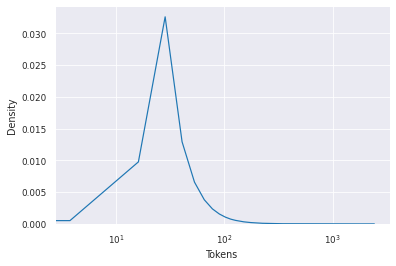

In [22]:
grid = sns.kdeplot(df['Tokens'])
grid.set(xscale='log')
grid.figure.savefig('img/tokendist.png')

In [23]:
stoplist = set(stopwords.words("english"))
nlp = spacy.load('en')
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

In [24]:
def clean_doc(input):
    doc = re.sub("\s\s+", " ", input)
    doc = re.sub('[%s]' % re.escape(string.punctuation), ' ', doc)
    doc = [str(word) for word in nlp.tokenizer(doc.lower()) if str(word) not in stoplist]
    doc = [lemmatizer.lemmatize(word) for word in doc]
    doc = [stemmer.stem(word) for word in doc]
    result = list()
    for word in doc:
        for char in word:
            if char != ' ':
                result.append(word)
                break
    doc = result
    return doc

In [25]:
pd.set_option('display.max_colwidth', -1)

df['text'] = df['reviewText'].apply(clean_doc)
df[['reviewText', 'text']].head()

<ipython-input-25-4c8002aa873c>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,reviewText,text
0,"I have decided not to play this game. I can't keep track of everyone, or play often enough to make it fun.","[decid, play, game, keep, track, everyon, play, often, enough, make, fun]"
1,"The Amazon Appstore free app of the day for June 9th, 2014 is Sudoku by Nikoli Easy 01 from Nikoli Co.As the others have mentioned in their reviews, this Sudoku version is at an average or below average quality. It has nothing that sets it apart from the many other Android Sudoku apps out there.There was one particular gaming market though where this app and every other Sudoku app has failed to reach: The Fire TV. When Amazon announced the Fire TV about 2 months ago, Amazon and other developers were quick to point out how easy it was to make existing game apps compatible with the Fire TV.But after 2 months later after the release of Fire TV, we have several apps that are not very useful for the Fire TV such as a fireplace screensaver and a raindrops screensaver, but NOT a single Sudoku app for the Fire TV exists yet despite TVs and other streaming boxes that have a Sudoku game on them. How could Amazon let an oversight like this happen?Had this app developer done their homework and made this app be the first Sudoku compatible app for the Fire TV, they might have gotten better reviews and stood out some from the many other Sudoku apps in Amazon's market.It appears our best hope for a Sudoku game to make it to the Fire TV without having to sideload one into the Fire TV is to wait for this ""Spring"" update Amazon has been mentioning forever in what seems to be the ""Longest Spring Ever"".Because of a huge missed opportunity of making this compatible with the Fire TV, that this only contains 20 easy puzzles, and because this app without Fire TV compatibility doesn't stand out from the many other tablet versions of Sudoku out there, I have no choice but to give this about 2 stars out of 5 stars.","[amazon, appstor, free, app, day, june, 9th, 2014, sudoku, nikoli, easi, 01, nikoli, co, other, mention, review, sudoku, version, averag, averag, qualiti, noth, set, apart, mani, android, sudoku, app, one, particular, game, market, though, app, everi, sudoku, app, fail, reach, fire, tv, amazon, announc, fire, tv, 2, month, ago, amazon, develop, quick, point, easi, make, exist, game, app, compat, fire, tv, 2, month, later, releas, fire, tv, sever, app, use, fire, tv, fireplac, screensav, raindrop, screensav, singl, sudoku, app, fire, tv, exist, yet, despit, tv, stream, box, sudoku, game, could, amazon, let, oversight, like, happen, app, develop, done, homework, made, ...]"
2,this game was so mush fun I wish I could play more. I loved it you just have to pay for up grade,"[game, mush, fun, wish, could, play, love, pay, grade]"
3,"Its pretty fun and very good looking, but you drive like at 300 mph, its pretty crazy. Overall a good game to get for free today.","[pretti, fun, good, look, drive, like, 300, mph, pretti, crazi, overal, good, game, get, free, today]"
4,good graphics; immersive storyline; hard to stop once you begin. a great bargain for entertainment and that's hard to find these days.,"[good, graphic, immers, storylin, hard, stop, begin, great, bargain, entertain, hard, find, day]"


In [26]:
train_df, test_df = train_test_split(df, stratify=df['score'], test_size=0.1)
test_df.to_csv('test.csv', index=False)
# save for future, to prepare script for inference from file
len(test_df)

55575